# Importing Modules


In [1]:
import numpy as np
import pandas as pd
import itertools
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt 

# Data Wrangling

 ## DataFrame

In [3]:
#Read the data
df=pd.read_csv('news.csv')

#Get shape and headdf.shape
df.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [8]:
import seaborn as sns

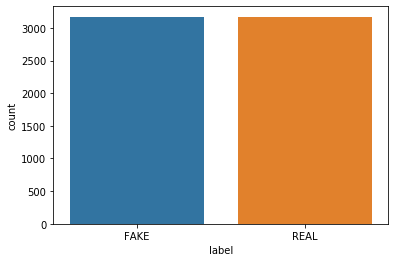

In [10]:
sns.countplot(x= "label", data = df)

## Information of the Data Set

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6335 entries, 0 to 6334
Data columns (total 4 columns):
Unnamed: 0    6335 non-null int64
title         6335 non-null object
text          6335 non-null object
label         6335 non-null object
dtypes: int64(1), object(3)
memory usage: 198.1+ KB


In [12]:
all_words = ' '.join([text for text in df['text']])

In [13]:
from wordcloud import WordCloud
from PIL import Image
import requests

In [14]:
mask = np.array(Image.open(requests.get('http://clipart-library.com/images/Lid5ezbET.jpg', stream=True).raw))

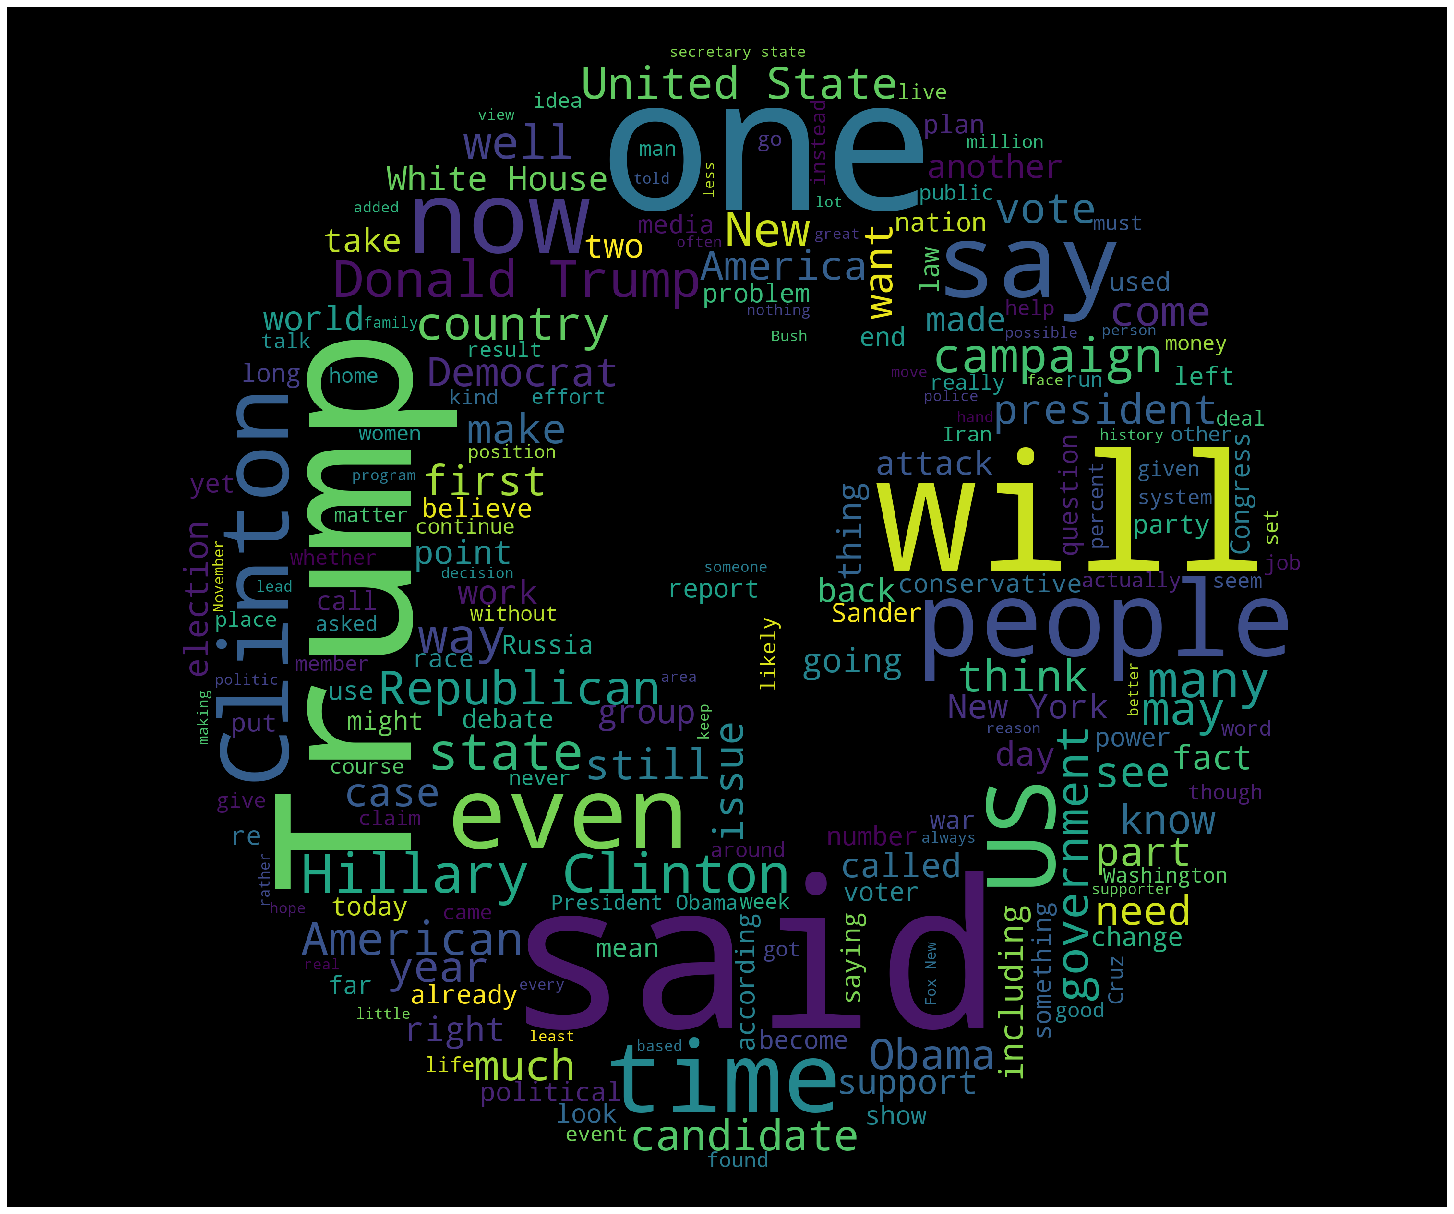

In [16]:
def generate_wordcloud(all_words, mask):
    word_cloud = WordCloud(width = 900, height = 600, background_color='black', mask=mask).generate(all_words)
    plt.figure(figsize=(20,18),facecolor = 'white', edgecolor='blue')
    plt.figure
    plt.imshow(word_cloud)
    plt.axis('off')
    plt.tight_layout(pad=0)
    plt.show()
generate_wordcloud(all_words,mask)

###  Labels from the DataFrame.

In [17]:
#DataFlair - Get the labels
labels=df.label
labels.head()

0    FAKE
1    FAKE
2    REAL
3    FAKE
4    REAL
Name: label, dtype: object

### Split the dataset into training and testing sets.

In [18]:
#DataFlair - Split the dataset
x_train,x_test,y_train,y_test=train_test_split(df['text'], labels, test_size=0.2, random_state=7)

Let’s initialize a TfidfVectorizer with stop words from the English language and a maximum document frequency of 0.7 (terms with a higher document frequency will be discarded).
Stop words are the most common words in a language that are to be filtered out before processing the natural language data.
 And a TfidfVectorizer turns a collection of raw documents into a matrix of TF-IDF features.
 Now, fit and transform the vectorizer on the train set, and transform the vectorizer on the test set.

In [19]:
#DataFlair - Initialize a TfidfVectorizer
tfidf_vectorizer=TfidfVectorizer(stop_words='english', max_df=0.7)

#DataFlair - Fit and transform train set, transform test set
tfidf_train=tfidf_vectorizer.fit_transform(x_train) 
tfidf_test=tfidf_vectorizer.transform(x_test)

We’ll initialize a PassiveAggressiveClassifier. This is. We’ll fit this on tfidf_train and y_train.

Then, we’ll predict on the test set from the TfidfVectorizer and calculate the accuracy with accuracy_score() from sklearn.metrics

In [20]:
#DataFlair - Initialize a PassiveAggressiveClassifier
pac=PassiveAggressiveClassifier(max_iter=50)
pac.fit(tfidf_train,y_train)

#DataFlair - Predict on the test set and calculate accuracy
y_pred=pac.predict(tfidf_test)
score=accuracy_score(y_test,y_pred)
print(f'Accuracy: {round(score*100,2)}%')

Accuracy: 92.82%


#### We got an accuracy of 92.66% with this model. Finally, let’s print out a confusion matrix to gain insight into the number of false and true negatives and positives.

In [23]:
#DataFlair - Build confusion matrix
cm = confusion_matrix(y_test,y_pred, labels=['FAKE','REAL'])
cm

array([[590,  48],
       [ 43, 586]], dtype=int64)

#### So with this model, we have 586 true positives,52 true negatives,41 false positives, and 588 false negatives.

# Summary
### Today, we learned to detect fake news with Python. We took a political dataset, implemented a TfidfVectorizer, initialized a PassiveAggressiveClassifier, and fit our model. We ended up obtaining an accuracy of 93.05% in magnitude.

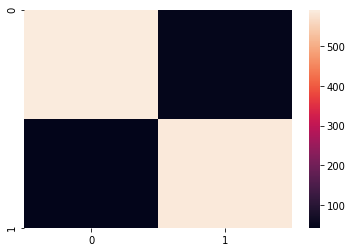

In [26]:
sns.heatmap(confusion_matrix(y_test,y_pred, labels=['FAKE','REAL']))